In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
digits=pd.read_csv('mnist_train.csv',header=None,dtype='int64')

In [3]:
digits

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 119.8 MB


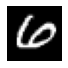

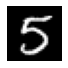

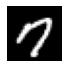

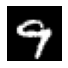

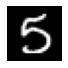

In [5]:
for i in range(5):
    plt.figure(figsize=(1,1))
    plt.imshow(digits.iloc[i,1:].values.reshape(28,28),cmap='gray')
    plt.axis('off')

In [6]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 

In [7]:
model=Sequential()
model.add(Dense(units=400,
                input_dim=784,
                activation='relu',name='First_hidden_layer'))
# units is avg of nodes 784+10/2 =approx 400

model.add(Dense(units=10,
                activation='softmax',
                name='output_layer'))

model.summary()
# output is summary of model
# batchwise rows are changes thats why none rows are there it is similar to -1
# param is parameter which are weights and bias

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
First_hidden_layer (Dense)   (None, 400)               314000    
_________________________________________________________________
output_layer (Dense)         (None, 10)                4010      
Total params: 318,010
Trainable params: 318,010
Non-trainable params: 0
_________________________________________________________________


In [8]:
#https://www.youtube.com/watch?v=dFYrha09He4&t=3s

In [9]:
# every layer connected to every other node
784 *400  #these are nodes
400 #this are bias
print("total weights are {}".format(784 *400))
print("bias are {}".format(400))
print('total parameter learn for 1st layer ={}'.format(784*400 + 400))

total weights are 313600
bias are 400
total parameter learn for 1st layer =314000


In [10]:
# second layer input is 400  which is output of 1st ;ayer
# 10 is a bias
print('total parameter in 2nd layer is ={}'.format(400*10+10))

total parameter in 2nd layer is =4010


In [11]:
len(model.get_weights())

4

In [12]:
# this is a layer 1
model.get_weights()[0].shape

(784, 400)

In [13]:
# this is bias of above layer
model.get_weights()[1].shape

(400,)

In [14]:
# this is weightage of layer 2
model.get_weights()[2].shape

(400, 10)

In [15]:
# this is a bias of layer 2
model.get_weights()[3].shape

(10,)

In [16]:
from tensorflow.keras.utils import plot_model

In [17]:
plot_model(model,show_shapes=True)
# it shows graphical representation of above summary architecture

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [18]:
# package require to see plot or graphical representation of model pip install pydot

In [19]:
# pip install graphviz

In [20]:
# pip install pydotplus

In [21]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

In [22]:
X=digits.iloc[:,1:].values
y=digits.iloc[:,0].values
print(X.shape,y.shape)

(20000, 784) (20000,)


In [23]:
from keras.models import load_model

In [24]:
# weights are getting updating here
model.fit(X,y,batch_size=200,epochs=3)
# batches are rows we are passing as a input at a time it is randoly selected
# here total 2000 rows are there so 
# print("one epoch has {} batches".format(20000//64))

Epoch 1/3
100/100 [==============================] - 1s 7ms/step - loss: 13.1901 - accuracy: 0.8371
Epoch 2/3
100/100 [==============================] - 1s 6ms/step - loss: 1.9474 - accuracy: 0.9344
Epoch 3/3
100/100 [==============================] - 1s 7ms/step - loss: 0.9217 - accuracy: 0.9572


In [25]:
digits_test=pd.read_csv('mnist_test.csv',header=None,dtype='int64')
digits_test.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
digits_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 59.9 MB


In [27]:
y_pred=model.predict(digits_test.iloc[:,1:].values)

In [28]:
y_pred.shape

(10000, 10)

In [29]:
y_pred[0,:]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [30]:
np.argmax(y_pred[0,:])

7

In [31]:
digits_test.iloc[0,0]

7

In [32]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report

In [33]:
y_pred1=np.argmax(y_pred,axis=1)
y_test=digits_test.iloc[:,0].values
print(confusion_matrix(y_test,y_pred1))

[[ 952    0    3    3    0    8    2    5    1    6]
 [   0 1094    5    4    0    1    2   19   10    0]
 [   5    6  986   13    4    2    2    6    6    2]
 [   1    1   15  954    0   10    0   11   16    2]
 [   3    0    7    0  921    2    5   10    4   30]
 [   6    0    2   34    3  798   15    6   21    7]
 [  16    3   13    0    8   10  902    2    4    0]
 [   0    2   26    6    3    0    0  969    2   20]
 [  15    2   23   25    8   12    4   11  859   15]
 [   6    0    3   10   22    2    3   45    9  909]]


In [34]:
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1004
           1       0.96      0.99      0.98      1108
           2       0.96      0.91      0.93      1083
           3       0.94      0.91      0.93      1049
           4       0.94      0.95      0.94       969
           5       0.89      0.94      0.92       845
           6       0.94      0.96      0.95       935
           7       0.94      0.89      0.92      1084
           8       0.88      0.92      0.90       932
           9       0.90      0.92      0.91       991

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.94      0.93      0.93     10000



In [35]:
# plot_confusion_matrix(y_pred1,y_test)

In [36]:
# new model
model=Sequential()
model.add(Dense(units=100,
                input_dim=784,
                activation='relu',name='First_hidden_layer'))
# units is avg of nodes 784+10/2 =approx 400

model.add(Dense(units=10,
                activation='softmax',
                name='output_layer'))

# model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

model.fit(X,y,batch_size=200,epochs=15)

Epoch 1/15
100/100 [==============================] - 1s 3ms/step - loss: 11.3097 - accuracy: 0.7720
Epoch 2/15
100/100 [==============================] - 0s 3ms/step - loss: 2.1834 - accuracy: 0.8949
Epoch 3/15
100/100 [==============================] - 0s 3ms/step - loss: 1.3191 - accuracy: 0.9183
Epoch 4/15
100/100 [==============================] - 0s 3ms/step - loss: 0.8707 - accuracy: 0.9336
Epoch 5/15
100/100 [==============================] - 0s 3ms/step - loss: 0.6097 - accuracy: 0.9474
Epoch 6/15
100/100 [==============================] - 0s 3ms/step - loss: 0.4436 - accuracy: 0.9553
Epoch 7/15
100/100 [==============================] - 0s 3ms/step - loss: 0.3176 - accuracy: 0.9620
Epoch 8/15
100/100 [==============================] - 0s 3ms/step - loss: 0.2402 - accuracy: 0.9678
Epoch 9/15
100/100 [==============================] - 0s 3ms/step - loss: 0.1858 - accuracy: 0.9717
Epoch 10/15
100/100 [==============================] - 0s 3ms/step - loss: 0.1514 - accuracy: 0.976

In [37]:
# new model with another layer
model=Sequential()
model.add(Dense(units=50,
                input_dim=784,
                activation='relu',name='First_hidden_layer'))
# units is avg of nodes 784+10/2 =approx 400
model.add(Dense(units=20,
               
                activation='relu',name='second_hidden_layer'))

model.add(Dense(units=10,
                activation='softmax',
                name='output_layer'))

# model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
model.summary()
# model.fit(X,y,batch_size=200,epochs=15)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
First_hidden_layer (Dense)   (None, 50)                39250     
_________________________________________________________________
second_hidden_layer (Dense)  (None, 20)                1020      
_________________________________________________________________
output_layer (Dense)         (None, 10)                210       
Total params: 40,480
Trainable params: 40,480
Non-trainable params: 0
_________________________________________________________________


In [38]:
# first layer weights and bias
784*50+50


39250

In [39]:
# second layer weights and bias
50*20+20

1020

In [40]:
# output layer weights and bias
20*10+10


210

In [41]:
model.fit(X,y,batch_size=200,epochs=10)

Epoch 1/10
100/100 [==============================] - 1s 3ms/step - loss: 10.7722 - accuracy: 0.2210
Epoch 2/10
100/100 [==============================] - 0s 3ms/step - loss: 1.9462 - accuracy: 0.2936
Epoch 3/10
100/100 [==============================] - 0s 3ms/step - loss: 1.7308 - accuracy: 0.3832
Epoch 4/10
100/100 [==============================] - 0s 3ms/step - loss: 1.5753 - accuracy: 0.4507
Epoch 5/10
100/100 [==============================] - 0s 3ms/step - loss: 1.4443 - accuracy: 0.4964
Epoch 6/10
100/100 [==============================] - 0s 3ms/step - loss: 1.3198 - accuracy: 0.5395
Epoch 7/10
100/100 [==============================] - 0s 3ms/step - loss: 1.2093 - accuracy: 0.5954
Epoch 8/10
100/100 [==============================] - 0s 3ms/step - loss: 1.0871 - accuracy: 0.6464
Epoch 9/10
100/100 [==============================] - 0s 3ms/step - loss: 0.9603 - accuracy: 0.7064
Epoch 10/10
100/100 [==============================] - 0s 3ms/step - loss: 0.8789 - accuracy: 0.732

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
# new model with another layer
model=Sequential()
model.add(Dense(units=400,
                input_dim=784,
                activation='relu',name='First_hidden_layer'))
# units is avg of nodes 784+10/2 =approx 400


model.add(Dense(units=10,
                activation='softmax',
                name='output_layer'))

# model.summary()
es=EarlyStopping(monitor='val_loss',patience=2)
# monitor is something we are monitoring val loss 
# patience is something though val loss increase it will wait for specified patience iterations
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
# model.summary()
model.fit(X,y,batch_size=32,epochs=15,
         validation_split=0.2,
         callbacks=[es])

Epoch 1/15
500/500 [==============================] - 3s 5ms/step - loss: 7.6606 - accuracy: 0.8646 - val_loss: 2.4462 - val_accuracy: 0.9005
Epoch 2/15
500/500 [==============================] - 2s 4ms/step - loss: 1.1193 - accuracy: 0.9339 - val_loss: 1.3373 - val_accuracy: 0.9168
Epoch 3/15
500/500 [==============================] - 2s 4ms/step - loss: 0.6254 - accuracy: 0.9477 - val_loss: 1.3862 - val_accuracy: 0.9247
Epoch 4/15
500/500 [==============================] - 2s 4ms/step - loss: 0.5217 - accuracy: 0.9552 - val_loss: 1.3587 - val_accuracy: 0.9240


In [44]:
# save the model
from tensorflow.keras.models import save_model

save_model(model,'tensorflow_mnist_model_saved.h5')

In [45]:
# load the model which is saved as h5 extension
from tensorflow.keras.models import load_model
my_model=load_model('tensorflow_mnist_model_saved.h5')
my_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
First_hidden_layer (Dense)   (None, 400)               314000    
_________________________________________________________________
output_layer (Dense)         (None, 10)                4010      
Total params: 318,010
Trainable params: 318,010
Non-trainable params: 0
_________________________________________________________________


In [46]:
my_model.get_weights()

[array([[-0.01354849,  0.03903637, -0.00935722, ..., -0.01342535,
          0.03341687,  0.07111778],
        [-0.03568246, -0.01118832,  0.0013561 , ..., -0.06921722,
         -0.04049788,  0.00754738],
        [-0.00038291, -0.04523688, -0.02138136, ..., -0.05567808,
          0.07033544,  0.02655936],
        ...,
        [ 0.06947511, -0.03765632,  0.06608491, ...,  0.03285798,
          0.05558155, -0.05552214],
        [-0.0446964 , -0.04051319,  0.05844256, ..., -0.06983328,
         -0.0103338 ,  0.02436624],
        [-0.00899776, -0.06895898, -0.01192551, ...,  0.04869232,
          0.01564178,  0.0605438 ]], dtype=float32),
 array([-1.49137219e-02, -6.49534445e-03, -2.42641591e-03, -1.02842953e-02,
        -7.31512997e-03, -2.06627138e-02,  7.51194719e-04, -1.75503641e-02,
        -8.72161146e-03, -1.44224586e-02, -8.81348737e-03, -2.31863428e-02,
        -2.32081953e-02, -1.89614892e-02, -1.83021389e-02, -9.50406305e-03,
        -2.55278461e-02, -1.53751308e-02, -1.19866785e

In [47]:
np.set_printoptions(suppress=True, precision=2)
in_mat = digits_test.iloc[2,1:].values
print(in_mat.shape)
my_model.predict(in_mat.reshape(1,784))


(784,)


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [48]:
digits_test.iloc[2,0]

1

In [49]:
from scipy.special import softmax

In [50]:
in_mat=in_mat.reshape(1,784)

In [51]:
hd_layer=my_model.get_layer('First_hidden_layer')

In [52]:
type(hd_layer)

tensorflow.python.keras.layers.core.Dense

In [53]:
len(hd_layer.get_weights())

2

In [54]:
op_layer=my_model.get_layer('output_layer')

In [55]:
len(hd_layer.get_weights())

2

In [56]:
ans1=np.dot(in_mat,hd_layer.get_weights()[0] + hd_layer.get_weights()[1])
ans1.shape

(1, 400)

In [57]:
 ans1=np.maximum(0,ans1)
#     here negative become zeros positive 

In [58]:
ans1

array([[  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,  55.35,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,  11.83,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          1.16,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  , 

In [59]:
ans2=np.dot(ans1,op_layer.get_weights()[0] + op_layer.get_weights()[1])
ans2.shape

(1, 10)

In [60]:
ans2

array([[-15.87,  27.38, -19.88, -18.28,  27.62,   9.68, -28.19, -11.91,
         28.32,  50.86]])

In [61]:
softmax(ans2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])